### Problem Statements:

The used-car market has expanded significantly due to rising vehicle prices and increasing consumer demand for affordable alternatives. However, determining the correct resale value of a car is complex because it depends on multiple factors such as the vehicle’s age, kilometers driven, fuel type, ownership history, and brand value. Traditional valuation methods are often inaccurate and rely heavily on manual expertise, leading to price mismatches and inconsistent estimations.

This project aims to develop a machine learning–based car price prediction model that accurately forecasts a car’s selling price using historical vehicle data. By analyzing key features such as manufacturing year, present showroom price, mileage, fuel type, transmission mode, and ownership details, the model provides a data-driven estimate of the resale value.

The objective is to help buyers, sellers, and dealerships make informed pricing decisions, reduce negotiation gaps, and improve transparency in the used-car market.

The outcome of this study is an intelligent prediction system that enhances decision-making, minimizes human error, and provides a fair valuation of used cars.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load a dataset 
data = pd.read_csv('car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
# Basic checks
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
data.shape

(301, 9)

In [6]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
data.describe(include='O')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [10]:
## checking  for duplicates
data.duplicated().sum()

np.int64(2)

In [11]:
# now removing the duplicates
data = data.drop_duplicates()

In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
print(data['Seller_Type'].unique())
print(data['Fuel_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [14]:
final_dataset=data[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [15]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Exploaratory Data Analysis

<Axes: xlabel='Selling_Price', ylabel='Count'>

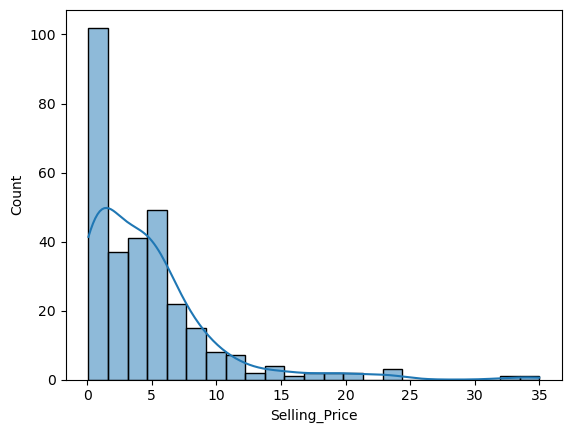

In [16]:
sns.histplot(x=data.Selling_Price,kde=True)

<Axes: xlabel='Present_Price', ylabel='Count'>

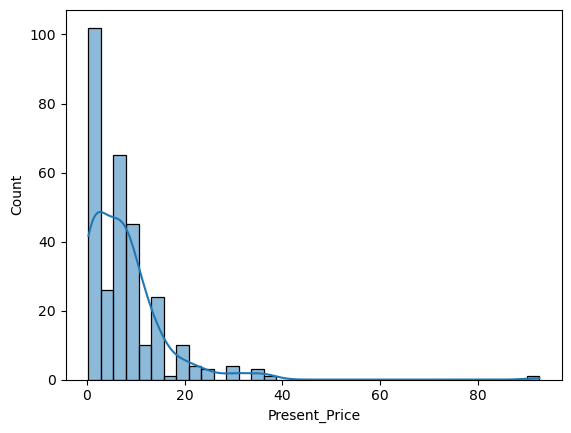

In [17]:
sns.histplot(x=data.Present_Price,kde=True)

<Axes: xlabel='Kms_Driven', ylabel='Count'>

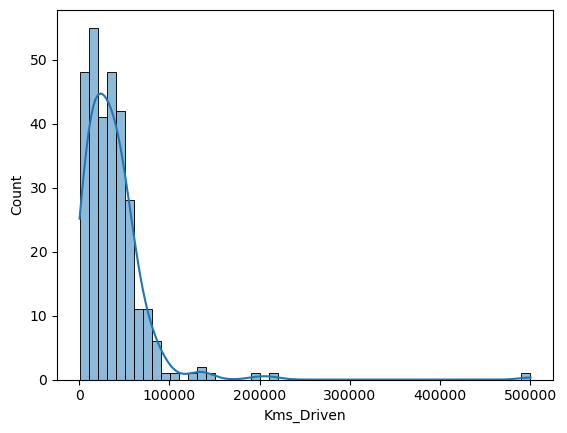

In [18]:
sns.histplot(x=data.Kms_Driven,kde=True)

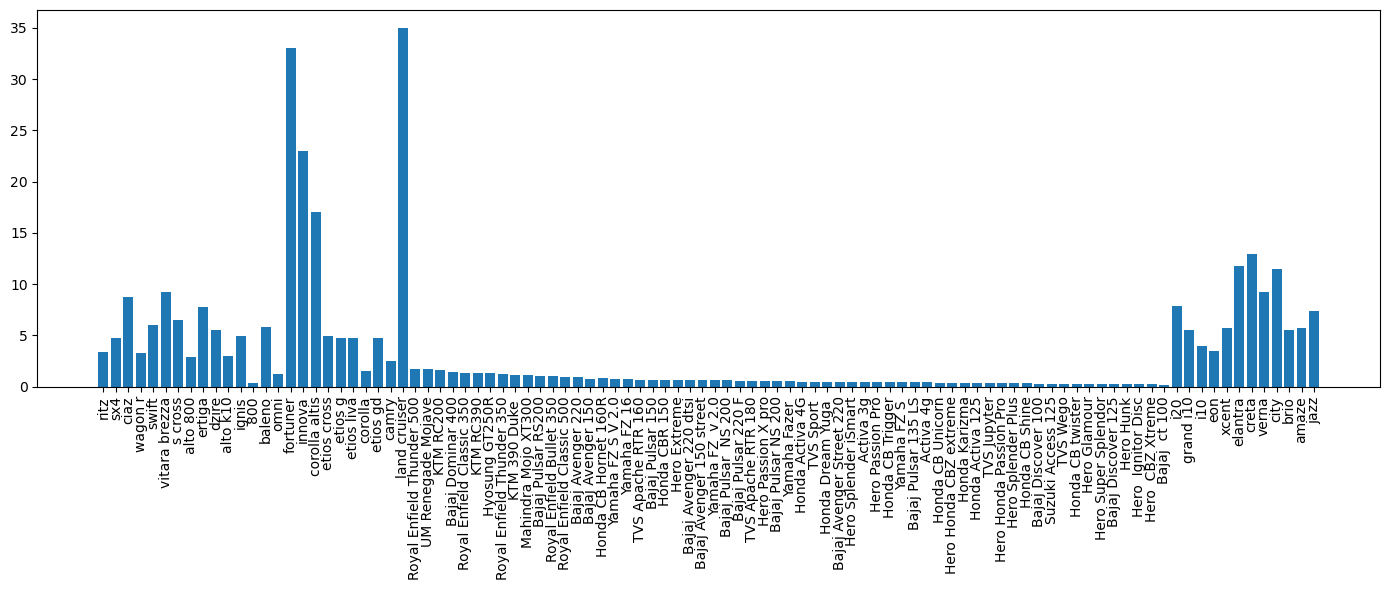

In [19]:
# check which car having the highest selling price
plt.figure(figsize=(14,6))
plt.bar(data['Car_Name'], data['Selling_Price'])
plt.xticks(rotation=90)   # rotate x-axis labels
plt.tight_layout()
plt.show()

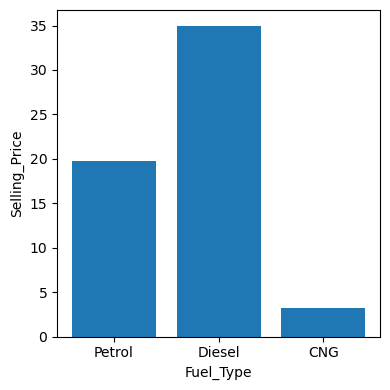

In [20]:
plt.figure(figsize=(4,4))
plt.bar(data['Fuel_Type'], data['Selling_Price'])
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.tight_layout()
plt.show()

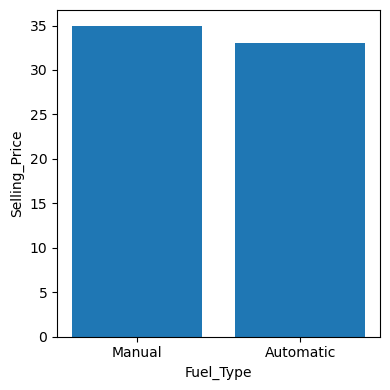

In [21]:
plt.figure(figsize=(4,4))
plt.bar(data['Transmission'], data['Selling_Price'])
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.tight_layout()
plt.show()

### Data Preprocessing

In [22]:
## Adding a column of current year
final_dataset['Current Year']=2020

In [23]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [24]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']

In [25]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [26]:
## Drop year as we not needed
final_dataset.drop(['Year'],axis=1,inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [27]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [28]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2020,6,False,True,False,True
1,4.75,9.54,43000,0,2020,7,True,False,False,True
2,7.25,9.85,6900,0,2020,3,False,True,False,True
3,2.85,4.15,5200,0,2020,9,False,True,False,True
4,4.60,6.87,42450,0,2020,6,True,False,False,True


In [29]:
## Drop current year as well
final_dataset=final_dataset.drop(['Current Year'],axis=1)

In [30]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


### Feature Enginnering


In [31]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.876378,0.028566,-0.087880,-0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,0.876378,1.000000,0.205253,0.009947,0.053563,0.464849,-0.456746,-0.511686,-0.334265
Kms_Driven,0.028566,0.205253,1.000000,0.089367,0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.087880,0.009947,0.089367,1.000000,0.181639,-0.051836,0.054102,0.123646,-0.052166
no_year,-0.234369,0.053563,0.525714,0.181639,1.000000,-0.056469,0.052197,0.036820,-0.003434
Fuel_Type_Diesel,0.543541,0.464849,0.173295,-0.051836,-0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.531636,-0.456746,-0.173595,0.054102,0.052197,-0.979104,1.000000,0.353865,0.078700
Seller_Type_Individual,-0.553851,-0.511686,-0.101030,0.123646,0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,-0.348869,-0.334265,-0.163881,-0.052166,-0.003434,-0.086264,0.078700,0.058669,1.000000


<Axes: >

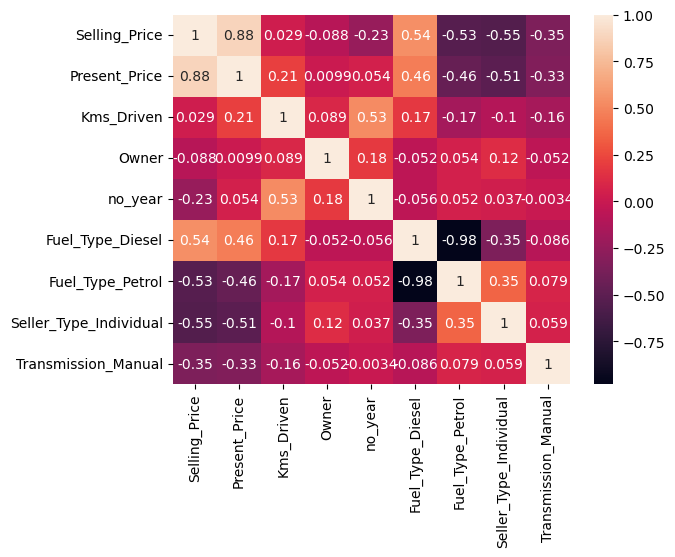

In [32]:
sns.heatmap(final_dataset.corr(),annot=True)

### Model Selection

In [33]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [34]:
X['Owner'].unique()

array([0, 1, 3])

In [35]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,False,True,False,True
1,9.54,43000,0,7,True,False,False,True
2,9.85,6900,0,3,False,True,False,True
3,4.15,5200,0,9,False,True,False,True
4,6.87,42450,0,6,True,False,False,True


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Random Forest Regressor

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [107]:
rf_pred = rf.predict(X_test)

In [108]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
MSE = mean_squared_error(y_test,rf_pred)
MAE = mean_absolute_error(y_test,rf_pred)
RMSE = root_mean_squared_error(y_test,rf_pred)

In [109]:
MSE

2.49933910088889

In [110]:
MAE

0.693922222222222

In [111]:
RMSE

1.580929821620457

In [112]:
r2_score(y_test,rf_pred)

0.8966918741861674

In [44]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['log2','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_sample_split = [2,5,10,15,100]
min_sample_leaf = [1,2,5,10]

In [45]:
# create the random grid
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth': max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_sample_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['log2', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [46]:
## use random grid to search for best hyperparameter 
rf_random = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,scoring='r2',n_iter = 10,cv = 10,verbose=2,random_state=42,n_jobs=1)

In [47]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=9

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='r2', verbose=2)

In [48]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [49]:
rf_random.best_score_

np.float64(0.8083125104517548)

In [63]:
rf = RandomForestRegressor(n_estimators=1000, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 25)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [64]:
predictions=rf_random.predict(X_test)

In [65]:
r2_score(y_test,predictions)

0.8489837238968067

### XGBoost


In [66]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=300,learning_rate=0.1,max_depth=8,subsample=0.8,random_state=42)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [67]:
xgb_pred = xgb.predict(X_test)


In [68]:
r2_score(y_test,xgb_pred)

0.9318990363803081

In [69]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=params,
    cv=5,
    n_iter=20,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)


In [70]:
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [73]:
xgb2 = XGBRegressor(subsample= 0.6, n_estimators= 300, max_depth= 7, learning_rate= 0.1, colsample_bytree= 1.0)
xgb2.fit(X_train,y_train)
xgb_predict = xgb2.predict(X_test)

In [74]:
r2_score(y_test,xgb_predict)

0.9268334317497249

### Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [76]:
lr_pred = lr.predict(X_test)
lr_pred

array([ 6.41568043, -1.75705428,  7.66849371,  5.48462698,  3.07324085,
        1.39047075,  6.83376063,  5.57597498, 13.98303842,  1.91651231,
        4.62709842,  8.33528138,  0.61767076,  3.33848912,  2.91071115,
        4.75288172,  3.77019648,  9.71119794,  5.33144693,  7.52462642,
       -2.8315132 ,  1.61275067,  1.94184205,  1.02491268,  5.84916539,
        1.16700007, -7.71523241,  6.17917402,  8.81972657,  5.12099971,
        9.76349755, 10.33667479,  7.90929958,  0.63058536,  4.95119797,
        0.288685  ,  1.85057546, -2.16297007,  5.16734669,  9.18905704,
        6.37873786,  7.49083499, 16.44954647,  2.93835002,  4.87587433,
        1.28024716,  4.44962457,  6.10596912,  7.28315642,  2.90047023,
        6.31805221,  4.53560211, -1.09626006,  1.6051701 ,  9.03140988,
        9.72935014,  0.34327504,  4.01575596,  7.36183284,  2.97269046,
        0.79856957,  0.38551   , 21.12540461,  4.50507544,  5.62899786,
        6.50738177,  4.53440208,  1.28808105,  5.4336435 ,  0.51

In [79]:
r2_score(y_test,lr_pred)

0.816392737006782

### ANN

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN Model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # IMPORTANT

model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1)

# Predict
ann_pred = model.predict(X_test)
ann_train_pred = model.predict(X_train)

# R2 Score
print("R2 score on testing:", r2_score(y_test, ann_pred))
print("R2 score on training:", r2_score(y_train, ann_train_pred))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 38.6232  
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.2984 
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.8666 
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4513 
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.4565 
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.3267 
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5450 
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2452 
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2086 
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.2399
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4290 
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7716
Epoch 13/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1915 
Epoch 14/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7800 
Epoch 15/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4500 
Epoch 16/500

In [116]:
results = {
    'Linear Regression': r2_score(y_test, lr_pred),
    'Random Forest': r2_score(y_test, rf_pred),
    'XGBoost': r2_score(y_test, xgb_predict),
    'ANN Model': r2_score(y_test, ann_pred)
}
results_df = pd.DataFrame(results.items(),columns=['Model', 'R2 Score'])
results_df

,Model,R2 Score
0,Linear Regression,0.816393
1,Random Forest,0.896692
2,XGBoost,0.926833
3,ANN Model,0.962230


In [120]:
import pickle

# open a file to store the model
with open('car_price.pkl', 'wb') as file:
    pickle.dump(model, file)


### Project Closing Description

In this project, the primary objective was to build a machine learning model capable of accurately predicting the selling price of used cars based on various features such as manufacturing year, present price, kilometers driven, fuel type, transmission type, and ownership details. A complete end-to-end workflow was followed, including data cleaning, exploratory data analysis (EDA), feature engineering, handling outliers, encoding categorical variables, model building, hyperparameter tuning, and model evaluation.

Among all the models, the Artificial Neural Network (ANN) delivered the highest R² score of 0.962, indicating that it captures non-linear relationships in the dataset more effectively and provides superior predictive performance. XGBoost was the second-best performer with a strong R² score of 0.926, followed by Random Forest at 0.896, and Linear Regression at 0.816, which still performed reasonably well considering its simplicity.


### Overall Conclusion

The results clearly show that machine learning techniques, especially deep learning models such as ANN, can significantly improve prediction accuracy for car pricing. The ANN model can be confidently recommended as the final model for deployment, given its strong ability to generalize the data and handle complex feature interactions.

                                                            --DONE--